In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"Country_data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
X = df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

In [6]:
scl = StandardScaler()
X_scaled = scl.fit_transform(X)

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

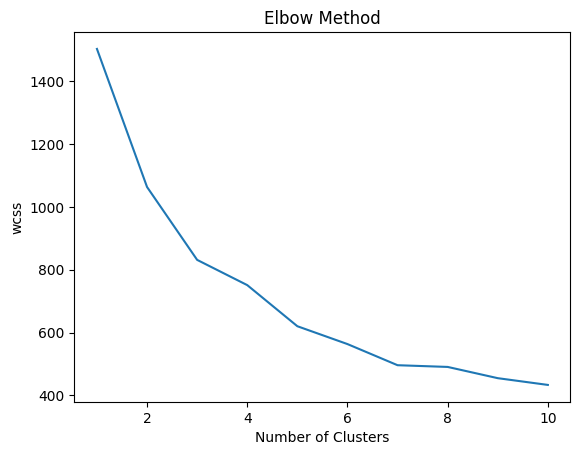

In [13]:
# We do some plotting boiii
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.show()

In [14]:
k = 3
kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [15]:
df['cluster'] = kmeans.labels_

In [19]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


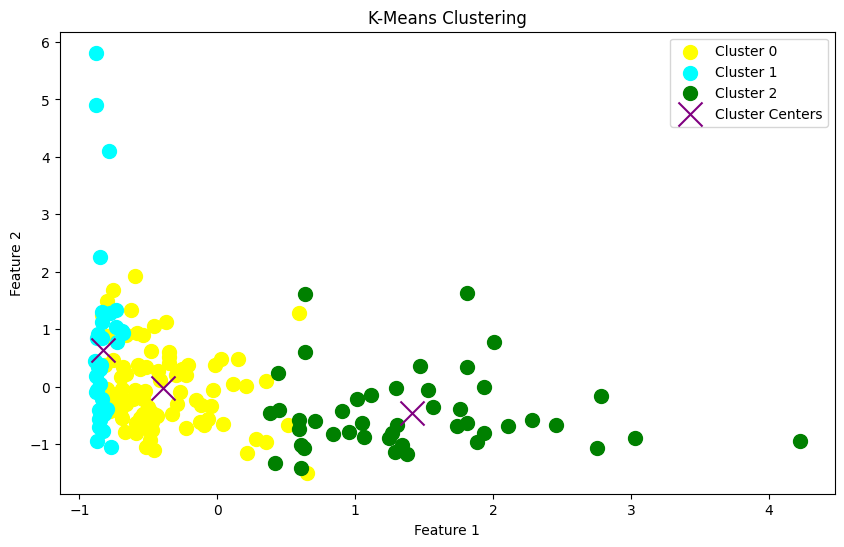

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(X_scaled[df['cluster']==0][:,0],X_scaled[df['cluster']==0][:,1],s=100,c='yellow',label='Cluster 0')
plt.scatter(X_scaled[df['cluster']==1][:,0],X_scaled[df['cluster']==1][:,1],s=100,c='cyan',label='Cluster 1')
plt.scatter(X_scaled[df['cluster']==2][:,0],X_scaled[df['cluster']==2][:,1],s=100,c='green',label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',s=300,c='purple',label='Cluster Centers')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()